In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'])

# Clean data
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 5)
    plt.plot(df['date'], df['value'], color='r')
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["month"]= df_bar['date'].dt.month
    df_bar["year"]= df_bar['date'].dt.year
    df_bar_grouped = df_bar.groupby(["year","month"])["value"].mean().unstack()

    # Draw bar plot
    ax = df_bar_grouped.plot.bar(figsize=(14,5))
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.legend(labels = [d for d in pd.to_datetime(df_bar_grouped.columns, format='%m').month_name()])

    fig = ax.get_figure()
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(nrows = 1, ncols =2 )
    fig.set_size_inches(15, 5)
    axes[0].set(title="Year-wise Box Plot (Trend)")
    axes[1].set(title="Month-wise Box Plot (Seasonality)")

    sns.boxplot(y=df_box['value'], x=df_box['year'], ax=axes[0])
    sns.boxplot(y=df_box['value'], x=df_box['month'], 
                order= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ax=axes[1])

    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [35]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [44]:
df = df[(df['value']>df['value'].quantile(0.025)) & (df['value']<df['value'].quantile(0.975))]
df.count()


date     1238
value    1238
dtype: int64

Text(0, 0.5, 'Page Views')

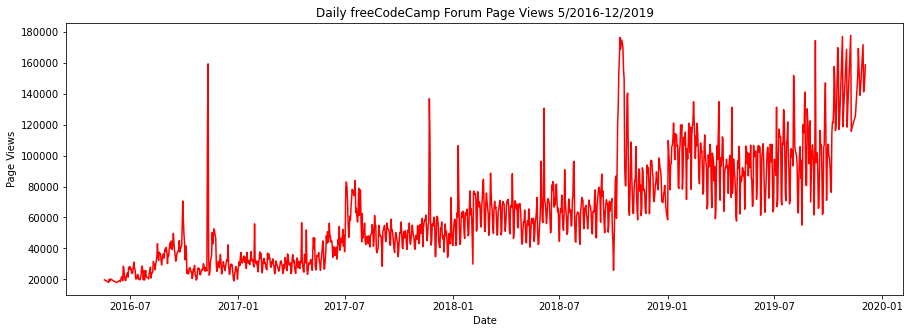

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plt.plot(df['date'], df['value'], color='r')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

In [93]:
df_bar = df.copy()
df_bar["month"]= df_bar['date'].dt.month
df_bar["year"]= df_bar['date'].dt.year
df_bar_grouped = df_bar.groupby(["year","month"])["value"].mean().unstack()

df_bar_grouped

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


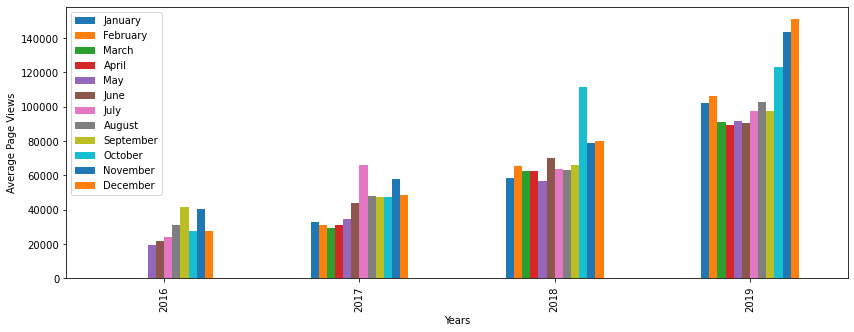

In [91]:
ax = df_bar_grouped.plot.bar(figsize=(14,5))
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.legend(labels = [d for d in pd.to_datetime(df_bar_grouped.columns, format='%m').month_name()])

In [130]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,index,date,value,year,month
0,10,2016-05-19,19736,2016,May
1,17,2016-05-26,18060,2016,May
2,18,2016-05-27,19997,2016,May
3,19,2016-05-28,19044,2016,May
4,20,2016-05-29,20325,2016,May
...,...,...,...,...,...
1233,1294,2019-11-24,138875,2019,Nov
1234,1299,2019-11-29,171584,2019,Nov
1235,1300,2019-11-30,141161,2019,Nov
1236,1301,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

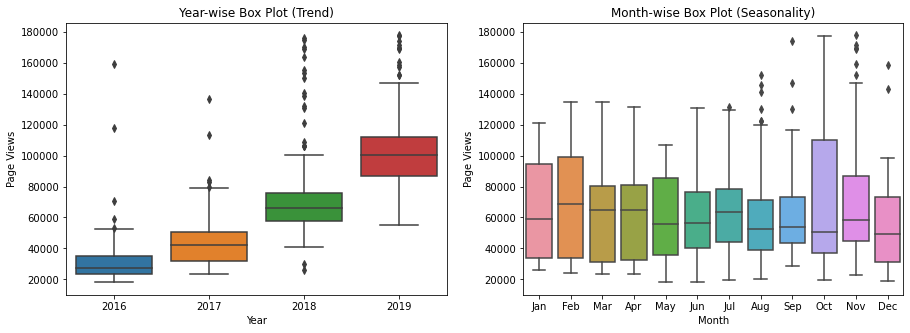

In [131]:
fig, axes = plt.subplots(nrows = 1, ncols =2 )
fig.set_size_inches(15, 5)
axes[0].set(title="Year-wise Box Plot (Trend)")
axes[1].set(title="Month-wise Box Plot (Seasonality)")

sns.boxplot(y=df_box['value'], x=df_box['year'], ax=axes[0])
sns.boxplot(y=df_box['value'], x=df_box['month'], 
            order= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ax=axes[1])

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')